In [12]:
import numpy as np
import pandas as pd
import multiprocessing as mp
import glob
import re
import time, timeit
import matplotlib.pyplot as plt
from functions import weightsample, als, rk, brk, alstest, rktest, brktest, alswrite, rkwrite, brkwrite, listener, alsmp, rkmp, brkmp, read, extracterr

# Speed Comparisons

## RK vs BRK

In [71]:
bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
np.count_nonzero(b200 == 0) / (b200.shape[0]*b200.shape[1])

0.553175

In [5]:
%%time
error = rktest(b200, k = 4, niter = 100, kacziter = 1000)

Wall time: 20.3 s


In [6]:
%%time
error = brktest(b200, k = 4, s = 1, niter = 100, kacziter = 1000)

Wall time: 15.5 s


## ALS vs BRK

In [7]:
%%time
error = alstest(b200, k = 4, niter = 100*1000)

Wall time: 32.1 s


In [8]:
%%time
error = brktest(b200, k = 4, s = 200, niter = 100, kacziter = 1000)

Wall time: 33.8 s


# Sparse Tests

## 50x50 matrix

In [72]:
sfactor50 = np.random.choice(4, size=(50,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight50 = np.random.randint(0, 2, size=(4, 50))
s50 = np.matmul(sfactor50, sweight50)
np.count_nonzero(s50 == 0) / (s50.shape[0]*s50.shape[1])

0.512

In [7]:
%%time
fname = "Errors/salserr50.txt"
alsmp(s50, k = 4, niter = 100, filename = fname, loop = 15)
salserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(salserr50)

[0.38420618 0.29623185 0.42163281 0.40645825 0.37964073 0.41054305
 0.44203489 0.30687028 0.31597839 0.35182171 0.35256397 0.34254329
 0.31229496 0.4081136  0.40742362]
Wall time: 821 ms


In [75]:
%%time
fname = "Errors/sbrkalserr50.txt"
brkmp(s50, k = 4, s = 50, niter = 100, kacziter = 1000, filename = fname, loop = 15)
sbrk50err50 = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk50err50)

[0.40953313 0.39142642 0.42636876 0.46488628 0.3755663  0.42329456
 0.40750195 0.38567192 0.43142436 0.44344061 0.3899928  0.4327309
 0.39652966 0.39165409 0.36107959]
Wall time: 2min 11s


In [8]:
%%time
fname = "Errors/srkerr50.txt"
rkmp(s50, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr50 = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr50)

[1.18390955 0.98944136 1.05139001 1.12116848 1.13755777 1.10441665
 0.97488825 1.1612159  0.88377034 1.14643438 0.98412324 1.11999015
 1.11724917 1.24702333 0.98698378]
Wall time: 1min 14s


In [74]:
%%time
fname = "Errors/sbrkrkerr50.txt"
brkmp(s50, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
sbrk1err50 = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk1err50)

[1.32209014 1.11326078 1.20466338 1.61155654 1.31539943 1.46989057
 1.15329552 2.07695628 1.56082177 1.54789154 1.39641613 1.52869981
 1.1519425  1.37874682 1.48552956]
Wall time: 1min 17s


## 200x200 matrix

In [76]:
sfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight200 = np.random.randint(0, 2, size=(4, 200))
s200 = np.matmul(sfactor200, sweight200)
np.count_nonzero(s200 == 0) / (s200.shape[0]*s200.shape[1])

0.52845

In [6]:
%%time
fname = "Errors/salserr200.txt"
alsmp(s200, k = 4, niter = 100, filename = fname, loop = 15)
salserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(salserr200)

[0.69800074 0.73315758 0.71624703 0.69565913 0.73224554 0.68052433
 0.70920118 0.71996476 0.72743624 0.74639007 0.73475631 0.71144318
 0.74228782 0.68695157 0.71392328]
Wall time: 1.21 s


In [110]:
%%time
fname = "Errors/sbrkalserr200.txt"
brkmp(s200, k = 4, s = 200, niter = 100, kacziter = 1000, filename = fname, loop = 15)
sbrk200err200 = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk200err200)

[0.71789142 0.73556744 0.71736977 0.7206816  0.71881303 0.72767529
 0.70036026 0.70887766 0.71419045 0.74632658 0.71443073 0.72024206
 0.72286736 0.71759879 0.71703052]
Wall time: 5min 19s


In [4]:
%%time
fname = "Errors/srkerr200.txt"
rkmp(s200, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr200 = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr200)

[1.07046558 0.96626291 0.98479957 0.98807484 0.98778605 1.04139922
 0.96825765 0.94717635 1.04365655 1.10103661 0.9967595  1.03074732
 1.06907494 0.9923334  0.93555844]
Wall time: 1min 42s


In [111]:
%%time
fname = "Errors/sbrkrkerr200.txt"
brkmp(s200, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
sbrk1err200 = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk1err200)

[1.107062   1.10974751 1.24180456 1.22277218 1.0558441  1.05439756
 1.12582165 1.48932848 1.14757815 1.22806998 1.12803864 1.0846816
 1.33408318 1.27025374 1.28013696]
Wall time: 1min 21s


## 1000x1000 matrix

In [80]:
sfactor1k = np.random.choice(4, size=(1000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight1k = np.random.randint(0, 2, size=(4, 1000))
s1k = np.matmul(sfactor1k, sweight1k)
np.count_nonzero(s1k == 0) / (s1k.shape[0]*s1k.shape[1])

0.521335

In [3]:
%%time
fname = "Errors/salserr1k.txt"
alsmp(s1k, k = 4, niter = 100, filename = fname, loop = 15)
salserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(salserr1k)

[0.80573552 0.80216327 0.80657376 0.81001677 0.80149177 0.79916573
 0.80612909 0.80201629 0.80344161 0.8027064  0.80175479 0.81126418
 0.80535349 0.80105497 0.81371224]
Wall time: 10.6 s


In [81]:
%%time
fname = "Errors/sbrkalserr1k.txt"
brkmp(s1k, k = 4, s = 1000, niter = 100, kacziter = 1000, filename = fname, loop = 15)
sbrk1kerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk1kerr1k)

[0.80933991 0.80278014 0.8069687  0.8062686  0.8006387  0.80681907
 0.80238443 0.80783345 0.80103394 0.81340844 0.79988863 0.81004607
 0.79880363 0.80870494 0.80838993]
Wall time: 12min 28s


In [80]:
%%time
fname = "Errors/srkerr1k.txt"
rkmp(s1k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr1k)

[0.87677716 0.88692608 0.8973841  0.87853631 0.87853003 0.88139374
 0.8842172  0.91498297 0.88449002 0.85962563 0.86906372 0.88098857
 0.88927594 0.88205422 0.88487096]
Wall time: 4min 37s


In [82]:
%%time
fname = "Errors/sbrkrkerr1k.txt"
brkmp(s1k, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
sbrk1err1k = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk1err1k)

[0.90168907 0.95694253 0.92206567 0.89240453 0.9072506  0.90979955
 0.91629477 0.90741972 0.90892332 0.88792584 0.90250304 0.91116717
 0.92072746 0.91440177 0.92855916]
Wall time: 2min 14s


## 10,000x10,000 matrix

In [83]:
sfactor10k = np.random.choice(4, size=(10000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight10k = np.random.randint(0, 2, size=(4, 10000))
s10k = np.matmul(sfactor10k, sweight10k)
np.count_nonzero(s10k == 0) / (s10k.shape[0]*s10k.shape[1])

0.52070933

In [5]:
%%time
fname = "Errors/salserr10k.txt"
alsmp(s10k, k = 4, niter = 100, filename = fname, loop = 15, cores = 4)
salserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(salserr10k)

[0.82840739 0.82504429 0.82773252 0.82928556 0.82763171 0.8285348
 0.82737003 0.82887042 0.82889542 0.82897594 0.82679751 0.82827703
 0.82912263 0.82773023 0.82671306]
Wall time: 15min 20s


In [85]:
%%time
fname = "Errors/sbrkalserr10k.txt"
brkmp(s10k, k = 4, s = 10000, niter = 100, kacziter = 1000, filename = fname, loop = 15, cores = 4)
brk10kerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(brk10kerr10k)

[0.82583776 0.82676977 0.82617079 0.82759082 0.82639718 0.8273766
 0.82719956 0.82784144 0.82708988 0.82748373 0.82700575 0.82755176
 0.82672359 0.82729159 0.82718799]
Wall time: 1h 26min 59s


In [66]:
%%time
fname = "Errors/srkerr10k.txt"
rkmp(s10k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr10k)

[0.83463597 0.83132702 0.8326967  0.83105344 0.83522645 0.83206659
 0.83244447 0.83167453 0.83342598 0.83171137 0.83252735 0.8319188
 0.83074581 0.83371479 0.83355197]
Wall time: 53min 56s


In [86]:
%%time
fname = "Errors/sbrkrkerr10k.txt"
brkmp(s10k, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
brk1err10k = np.asarray(read(fname)[:-1]).astype(float)
print(brk1err10k)

[0.83845441 0.83670277 0.83915087 0.83813946 0.83739915 0.83761236
 0.83379502 0.8350459  0.83885333 0.85295429 0.83879564 0.83634928
 0.83516253 0.84921218 0.83760287]
Wall time: 34min 15s


## Error Plots

In [142]:
datapath = 'Errors/*.txt'
datafiles = list(glob.glob(datapath))

In [143]:
alstitle, alserr, alsstd = extracterr("sals", datafiles)
print(alstitle)

['50', '200', '1k', '10k']


In [144]:
rktitle, rkerr, rkstd = extracterr("srk", datafiles)

In [145]:
brkalstitle, brkalserr, brkalsstd = extracterr("sbrkals", datafiles)
brkrktitle, brkrkerr, brkrkstd = extracterr("sbrkrk", datafiles)

In [146]:
print(brkalstitle)
print(brkrktitle)

['50', '200', '1k', '10k']
['50', '200', '1k', '10k']


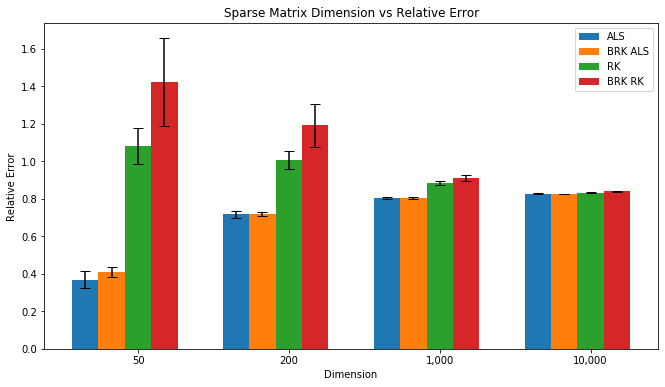

In [161]:
n = len(alserr)
ind = 2*np.arange(n)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, alserr, width, yerr=alsstd, capsize=5)
rects2 = ax.bar(ind+width, brkalserr, width, yerr=brkalsstd, capsize=5)
rects3 = ax.bar(ind+2*width, rkerr, width, yerr=rkstd, capsize=5)
rects4 = ax.bar(ind+3*width, brkrkerr, width, yerr=brkrkstd, capsize=5)

# add some
ax.set_ylabel('Relative Error')
ax.set_xlabel('Dimension')
ax.set_title('Sparse Matrix Dimension vs Relative Error')
ax.set_xticks(ind + 2*width)
ax.set_xticklabels( ('50', '200', '1,000', '10,000') )

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('ALS', 'BRK ALS', 'RK', 'BRK RK') )

plt.show()

# Dense Tests

## 50x50 matrix

In [87]:
dfactor50 = np.random.choice(4, size=(50,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight50 = np.random.randint(0, 2, size=(4, 50))
d50 = np.matmul(dfactor50, dweight50)
np.count_nonzero(d50 == 0) / (d50.shape[0]*d50.shape[1])

0.4848

In [6]:
%%time
fname = "Errors/dalserr50.txt"
alsmp(d50, k = 4, niter = 100, filename = fname, loop = 15)
dalserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr50)

[0.43371888 0.37504556 0.4476757  0.25585386 0.38419529 0.26802343
 0.32854191 0.4541685  0.37170317 0.27079105 0.32981316 0.33864429
 0.35125232 0.31467782 0.32253532]
Wall time: 1.73 s


In [89]:
%%time
fname = "Errors/dbrk1err50.txt"
brkmp(d50, k = 4, s = 50, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk50err50 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk50err50)

[0.41415609 0.34322362 0.34145347 0.38875901 0.3741523  0.43157208
 0.45474056 0.39762268 0.38052936 0.43843742 0.37274034 0.3644743
 0.43603401 0.41680571 0.40379223]
Wall time: 1min 42s


In [7]:
%%time
fname = "Errors/drkerr50.txt"
rkmp(d50, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr50 = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr50)

[0.82063677 0.9265537  0.94625839 0.93323904 1.13555342 0.96528852
 0.93338154 0.9885525  0.98971829 1.01658153 0.89295443 0.93343437
 0.84803218 1.20651647 1.00107148]
Wall time: 1min 11s


In [90]:
%%time
fname = "Errors/dbrk1err50.txt"
brkmp(d50, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk1err50 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err50)

[1.4388372  1.56553274 1.33707225 1.4369941  1.46693641 1.0906025
 1.5531184  1.05047844 1.22225224 1.37898488 1.54443979 1.22154177
 1.20378635 1.18534703 1.43369847]
Wall time: 1min 8s


## 200x200 matrix

In [92]:
dfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight200 = np.random.randint(0, 2, size=(4, 200))
d200 = np.matmul(dfactor200, dweight200)
np.count_nonzero(d200 == 0) / (d200.shape[0]*d200.shape[1])

0.5397

In [9]:
%%time
fname = "Errors/dalserr200.txt"
alsmp(d200, k = 4, niter = 100, filename = fname, loop = 15)
dalserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr200)

[0.71115283 0.67016919 0.69945936 0.70162428 0.71926671 0.71245664
 0.71715277 0.70377826 0.70599016 0.70705302 0.70836051 0.69214348
 0.71275215 0.71835256 0.67173452]
Wall time: 1.22 s


In [93]:
%%time
fname = "Errors/dbrk200err200.txt"
brkmp(d200, k = 4, s = 200, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk200err200 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk200err200)

[0.70033598 0.71734413 0.68968251 0.75412031 0.69908387 0.71498477
 0.72166805 0.73231394 0.70659329 0.7350821  0.73490232 0.71862133
 0.7310454  0.7363544  0.71108027]
Wall time: 5min 15s


In [10]:
%%time
fname = "Errors/drkerr200.txt"
rkmp(d200, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr200 = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr200)

[1.01963463 0.97079728 1.03464515 0.95089754 0.95455478 1.00505888
 0.92972789 0.951526   1.01876916 0.96120489 0.96973967 0.98574261
 0.97856256 0.98248655 0.95849656]
Wall time: 1min 42s


In [94]:
%%time
fname = "Errors/dbrk1err200.txt"
brkmp(d200, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk1err200 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err200)

[1.10238265 1.1670957  1.09057127 1.08099275 1.04033725 1.1155012
 1.21004994 1.17422411 1.11786864 1.03789822 1.13433232 1.05853215
 1.17790668 1.39008514 1.0656367 ]
Wall time: 1min 22s


## 1000x1000 matrix

In [67]:
dfactor1k = np.random.choice(4, size=(1000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight1k = np.random.randint(0, 2, size=(4, 1000))
d1k = np.matmul(dfactor1k, dweight1k)
np.count_nonzero(d1k == 0) / (d1k.shape[0]*d1k.shape[1])

0.525664

In [12]:
%%time
fname = "Errors/dalserr1k.txt"
alsmp(d1k, k = 4, niter = 100, filename = fname, loop = 15)
dalserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr1k)

[0.80175321 0.8093114  0.80925409 0.81665466 0.81168322 0.80925443
 0.81157313 0.80596311 0.81263762 0.80673858 0.80446207 0.80468717
 0.81520691 0.81214437 0.80760215]
Wall time: 10.6 s


In [ ]:
%%time
fname = "Errors/dbrk1err1k.txt"
brkmp(d1k, k = 4, s = 1, niter = 100, filename = fname, loop = 15)
dbrk1err1k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err1k)

In [68]:
%%time
fname = "Errors/drkerr1k.txt"
rkmp(d1k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr1k)

[0.87200605 0.87216129 0.88213478 0.87679657 0.86320041 0.89580873
 0.89142686 0.87965736 0.88007234 0.87006469 0.86548832 0.8723532
 0.87471097 0.87264556 0.86120275]
Wall time: 4min 28s


In [ ]:
%%time
fname = "Errors/dbrk1kerr1k.txt"
brkmp(d1k, k = 4, s = 1000, niter = 100, filename = fname, loop = 15)
dbrk1kerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1kerr1k)

## 10,000x10,000 matrix

In [69]:
dfactor10k = np.random.choice(4, size=(10000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight10k = np.random.randint(0, 2, size=(4, 10000))
d10k = np.matmul(dfactor10k, dweight10k)
np.count_nonzero(d10k == 0) / (d10k.shape[0]*d10k.shape[1])

0.52765071

In [4]:
%%time
fname = "Errors/dalserr10k.txt"
alsmp(d10k, k = 4, niter = 100, filename = fname, loop = 15, cores = 4)
dalserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr10k)

[0.82758483 0.82759903 0.82615887 0.82560387 0.82811139 0.82593277
 0.82680554 0.82897845 0.82587531 0.82538244 0.82798453 0.82888699
 0.82907092 0.82791305 0.8254652 ]
Wall time: 15min 8s


In [ ]:
%%time
fname = "Errors/dbrk1err10k.txt"
brkmp(d10k, k = 4, s = 1, niter = 100, filename = fname, loop = 15, cores = 4)
dbrk1err10k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err10k)

In [70]:
%%time
fname = "Errors/drkerr10k.txt"
rkmp(d10k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15, cores = 4)
drkerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr10k)

[0.83651625 0.8386287  0.83683639 0.83737113 0.83663193 0.83741887
 0.83551104 0.83579547 0.83489275 0.83846479 0.836588   0.83458544
 0.83558222 0.83657496 0.83836295]
Wall time: 58min 38s


In [ ]:
%%time
fname = "Errors/dbrk1err10k.txt"
brkmp(d10k, k = 4, s = 10000, niter = 100, filename = fname, loop = 15, cores = 4)
dbrk10kerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk10kerr10k)

# Error Plots

In [139]:
datapath = 'Errors/*.txt'
datafiles = list(glob.glob(datapath))
alstitle, alserr, alsstd = extracterr("dals", datafiles)
rktitle, rkerr, rkstd = extracterr("drk", datafiles)

In [140]:
print(alstitle)
print(rktitle)

['50', '200', '1k', '10k']
['50', '200', '1k', '10k']


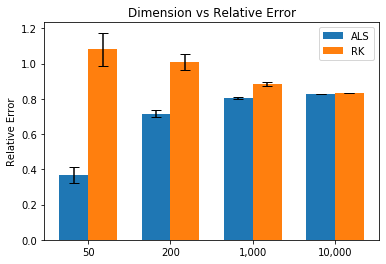

In [162]:
n = len(alserr)
ind = np.arange(n)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, alserr, width, yerr=alsstd, capsize=5)

rects2 = ax.bar(ind+width, rkerr, width, yerr=rkstd, capsize=5)

# add some
ax.set_ylabel('Relative Error')
ax.set_title('Dimension vs Relative Error')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('50', '200', '1,000', '10,000') )

ax.legend( (rects1[0], rects2[0]), ('ALS', 'RK') )

plt.show()

# BRK Sampling Tests

In [27]:
bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
np.count_nonzero(b200 == 0) / (b200.shape[0]*b200.shape[1])

0.512975

In [24]:
%%time
i = 2
while(i <= 10):
    fname = "Errors/BRK/sbrk" + str(i) + "err200.txt"
    brkmp(b200, k = 4, s = i, niter = 100, kacziter = 1000, filename = fname, loop = 15)
    i = i + 2

Wall time: 9min 52s


# Error Plots

In [56]:
datapath = 'Errors/BRK/*.txt'
datafiles = list(glob.glob(datapath))
#print(datafiles)
brktitle, brkerr, brkstd = extracterr("sbrk", datafiles)
#brkerr

In [57]:
data = pd.DataFrame({'k': list(map(int, brktitle)),
                     'err': brkerr,
                     'std': brkstd})
data = data.sort_values(by=['k'])
#data
#data.loc[data['err'] > 1]

(0, 3)

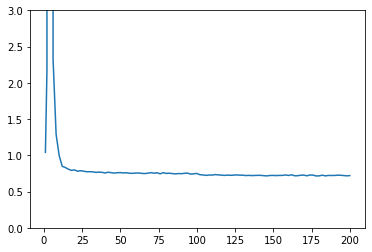

In [55]:
plt.errorbar(data['k'], data['err'], ecolor = 'black', capsize = 5)
plt.ylim([0, 3])

In [32]:
times = np.zeros(10)
for i in np.arange(10):
    times[i] = (timeit.timeit('5*10', number=10))

In [33]:
times

array([5.00003807e-07, 4.00003046e-07, 3.00002284e-07, 3.00002284e-07,
       2.99987732e-07, 3.00002284e-07, 3.00002284e-07, 3.00002284e-07,
       3.00002284e-07, 2.00001523e-07])